<a href="https://colab.research.google.com/github/furkanuyanik/churn-analysis/blob/master/churn-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("./churn.csv")

for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)

df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

churners = (df[df['Churn'] == 1])
churners_count = len(churners)

## Churn datası kadar Churn olmayan datası elde et.
non_churners = df[df['Churn'] == 0].sample(n=churners_count)

df2 = churners.append(non_churners)

try:
    customer_id = df2['customerID']
    del df2['customerID']
except:
    print("already removed customerID")

ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)

X = ml_dummies.iloc[:,0:5]  #independent columns
y = ml_dummies.iloc[:,-1]    #target column i.e price range

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


[0.10938052 0.0469087  0.04111996 0.77681274 0.02577808]


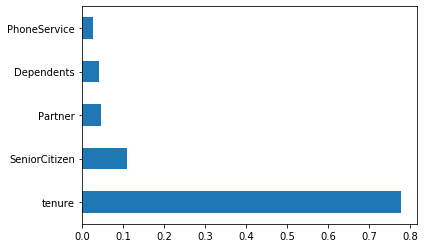

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.show()